# Walt Disney Company Stock Analysis

This notebook analyzes The Walt Disney Company's historical stock market data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


## Load Data


In [2]:
df_disney = pd.read_csv('datasets/walt_disney_company stock/The_Walt_Disney_Company_historical_data.csv')

print(f"Dataset shape: {df_disney.shape}")
print(f"Total records: {len(df_disney)}")
display(df_disney.head(10))
print("\nDataset Info:")
df_disney.info()
print("\nStatistical Summary:")
display(df_disney.describe())


Dataset shape: (16072, 8)
Total records: 16072


,Date,Open,High,Low,Close,Volume,ticker,name
0,1962-01-02 00:00:00-05:00,0.057441,0.059369,0.057441,0.057441,841958,DIS,The Walt Disney Company (DIS) Historical Data
1,1962-01-03 00:00:00-05:00,0.057441,0.058405,0.057441,0.058212,801865,DIS,The Walt Disney Company (DIS) Historical Data
2,1962-01-04 00:00:00-05:00,0.058212,0.058405,0.057827,0.058212,962238,DIS,The Walt Disney Company (DIS) Historical Data
3,1962-01-05 00:00:00-05:00,0.058212,0.058598,0.058020,0.058405,962238,DIS,The Walt Disney Company (DIS) Historical Data
4,1962-01-08 00:00:00-05:00,0.058405,0.059176,0.057056,0.058212,1282984,DIS,The Walt Disney Company (DIS) Historical Data
5,1962-01-09 00:00:00-05:00,0.058212,0.059369,0.057827,0.059369,641492,DIS,The Walt Disney Company (DIS) Historical Data
6,1962-01-10 00:00:00-05:00,0.059369,0.060332,0.059369,0.059947,681585,DIS,The Walt Disney Company (DIS) Historical Data
7,1962-01-11 00:00:00-05:00,0.059947,0.062067,0.059754,0.061681,2004663,DIS,The Walt Disney Company (DIS) Historical Data
8,1962-01-12 00:00:00-05:00,0.061681,0.061874,0.058983,0.059754,2004663,DIS,The Walt Disney Company (DIS) Historical Data
9,1962-01-15 00:00:00-05:00,0.059754,0.060140,0.059369,0.059754,641492,DIS,The Walt Disney Company (DIS) Historical Data



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16072 entries, 0 to 16071
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    16072 non-null  object 
 1   Open    16072 non-null  float64
 2   High    16072 non-null  float64
 3   Low     16072 non-null  float64
 4   Close   16072 non-null  float64
 5   Volume  16072 non-null  int64  
 6   ticker  16072 non-null  object 
 7   name    16072 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1004.6+ KB

Statistical Summary:


,Open,High,Low,Close,Volume
count,16072.000000,16072.000000,16072.000000,16072.000000,1.607200e+04
mean,28.813701,29.096091,28.514322,28.811942,6.508541e+06
std,41.650054,42.027072,41.231262,41.631122,6.437816e+06
min,0.034045,0.034239,0.032683,0.033461,3.892500e+04
25%,0.687807,0.694534,0.679399,0.687684,2.655448e+06
50%,10.308464,10.410484,10.197024,10.311902,5.301115e+06
75%,28.977568,29.275590,28.667627,28.982151,8.457248e+06
max,196.907412,199.691012,192.195949,198.599213,2.058672e+08


## Data Preprocessing


In [3]:
date_col = next((col for col in df_disney.columns if 'date' in col.lower()), None)
if date_col:
    df_disney[date_col] = pd.to_datetime(df_disney[date_col])
    df_disney = df_disney.sort_values(date_col)
    print(f"Date range: {df_disney[date_col].min()} to {df_disney[date_col].max()}")


Date range: 1962-01-02 00:00:00-05:00 to 2025-11-07 00:00:00-05:00


C:\Users\paulm\AppData\Local\Temp\ipykernel_32084\3062134444.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_disney[date_col] = pd.to_datetime(df_disney[date_col])


## Stock Price Visualization


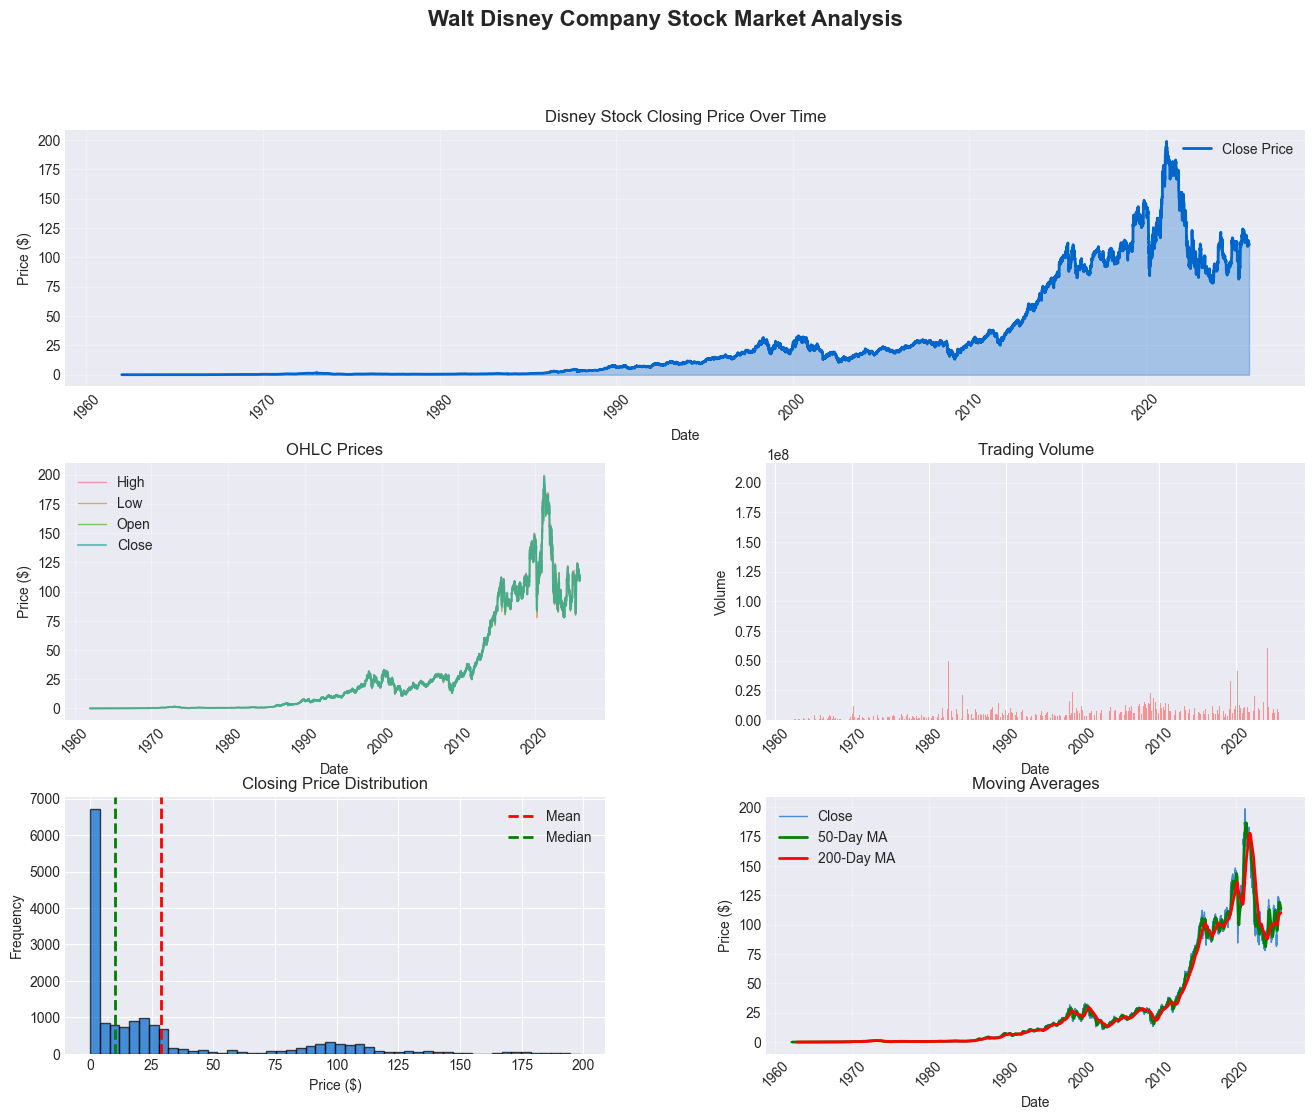

In [4]:
close_col = next((col for col in df_disney.columns if 'close' in col.lower()), None)
open_col = next((col for col in df_disney.columns if 'open' in col.lower()), None)
high_col = next((col for col in df_disney.columns if 'high' in col.lower()), None)
low_col = next((col for col in df_disney.columns if 'low' in col.lower()), None)
volume_col = next((col for col in df_disney.columns if 'volume' in col.lower()), None)

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
fig.suptitle('Walt Disney Company Stock Market Analysis', fontsize=16, fontweight='bold')

# Closing price over time
if date_col and close_col:
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(df_disney[date_col], df_disney[close_col], linewidth=2, color='#0066CC', label='Close Price')
    ax1.set_title('Disney Stock Closing Price Over Time')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price ($)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.fill_between(df_disney[date_col], df_disney[close_col], alpha=0.3, color='#0066CC')

# OHLC prices
if date_col and all([open_col, high_col, low_col, close_col]):
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(df_disney[date_col], df_disney[high_col], label='High', alpha=0.7, linewidth=1)
    ax2.plot(df_disney[date_col], df_disney[low_col], label='Low', alpha=0.7, linewidth=1)
    ax2.plot(df_disney[date_col], df_disney[open_col], label='Open', alpha=0.7, linewidth=1)
    ax2.plot(df_disney[date_col], df_disney[close_col], label='Close', alpha=0.7, linewidth=1.5)
    ax2.set_title('OHLC Prices')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Price ($)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

# Trading volume
if date_col and volume_col:
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.bar(df_disney[date_col], df_disney[volume_col], color='#FF6B6B', alpha=0.7)
    ax3.set_title('Trading Volume')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Volume')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3, axis='y')

# Price distribution
if close_col:
    ax4 = fig.add_subplot(gs[2, 0])
    ax4.hist(df_disney[close_col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='#0066CC')
    ax4.axvline(df_disney[close_col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    ax4.axvline(df_disney[close_col].median(), color='green', linestyle='--', linewidth=2, label='Median')
    ax4.set_title('Closing Price Distribution')
    ax4.set_xlabel('Price ($)')
    ax4.set_ylabel('Frequency')
    ax4.legend()

# Moving averages
if date_col and close_col:
    ax5 = fig.add_subplot(gs[2, 1])
    ax5.plot(df_disney[date_col], df_disney[close_col], linewidth=1, alpha=0.7, label='Close', color='#0066CC')
    if len(df_disney) >= 50:
        df_disney['MA_50'] = df_disney[close_col].rolling(window=50).mean()
        ax5.plot(df_disney[date_col], df_disney['MA_50'], linewidth=2, label='50-Day MA', color='green')
    if len(df_disney) >= 200:
        df_disney['MA_200'] = df_disney[close_col].rolling(window=200).mean()
        ax5.plot(df_disney[date_col], df_disney['MA_200'], linewidth=2, label='200-Day MA', color='red')
    ax5.set_title('Moving Averages')
    ax5.set_xlabel('Date')
    ax5.set_ylabel('Price ($)')
    ax5.tick_params(axis='x', rotation=45)
    ax5.legend()
    ax5.grid(True, alpha=0.3)

plt.show()


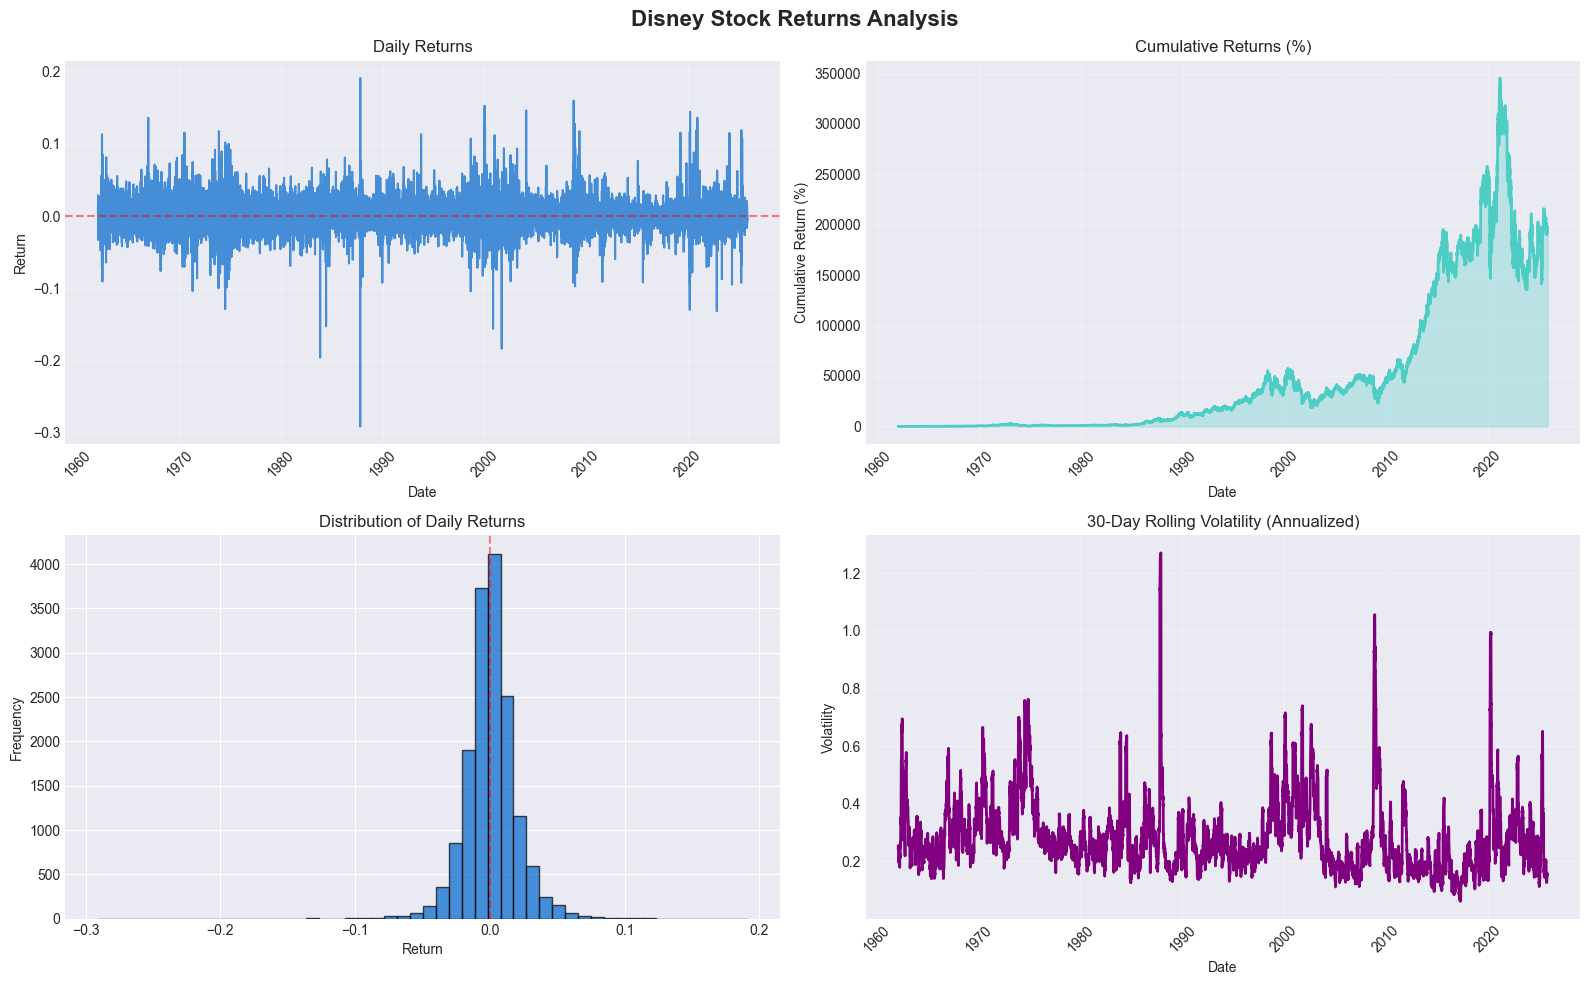

In [5]:
if close_col:
    df_disney['daily_return'] = df_disney[close_col].pct_change()
    df_disney['cumulative_return'] = (1 + df_disney['daily_return']).cumprod() - 1
    df_disney['rolling_volatility'] = df_disney['daily_return'].rolling(window=30).std() * np.sqrt(252)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Disney Stock Returns Analysis', fontsize=16, fontweight='bold')
    
    # Daily returns
    axes[0, 0].plot(df_disney[date_col], df_disney['daily_return'], alpha=0.7, color='#0066CC')
    axes[0, 0].set_title('Daily Returns')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Return')
    axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Cumulative returns
    axes[0, 1].plot(df_disney[date_col], df_disney['cumulative_return'] * 100, linewidth=2, color='#4ECDC4')
    axes[0, 1].set_title('Cumulative Returns (%)')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Cumulative Return (%)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].fill_between(df_disney[date_col], df_disney['cumulative_return'] * 100, alpha=0.3, color='#4ECDC4')
    
    # Distribution of returns
    axes[1, 0].hist(df_disney['daily_return'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='#0066CC')
    axes[1, 0].set_title('Distribution of Daily Returns')
    axes[1, 0].set_xlabel('Return')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].axvline(x=0, color='r', linestyle='--', alpha=0.5)
    
    # Rolling volatility
    axes[1, 1].plot(df_disney[date_col], df_disney['rolling_volatility'], linewidth=2, color='purple')
    axes[1, 1].set_title('30-Day Rolling Volatility (Annualized)')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Volatility')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


In [6]:
if close_col:
    print("=== Walt Disney Company Stock Summary ===")
    print(f"Total Trading Days: {len(df_disney)}")
    
    if date_col:
        print(f"\nDate Range: {df_disney[date_col].min().strftime('%Y-%m-%d')} to {df_disney[date_col].max().strftime('%Y-%m-%d')}")
        days = (df_disney[date_col].max() - df_disney[date_col].min()).days
        print(f"Total Days Covered: {days}")
    
    print(f"\nPrice Statistics:")
    print(f"  Current Price: ${df_disney[close_col].iloc[-1]:.2f}")
    print(f"  Average Price: ${df_disney[close_col].mean():.2f}")
    print(f"  Median Price: ${df_disney[close_col].median():.2f}")
    print(f"  Minimum Price: ${df_disney[close_col].min():.2f}")
    print(f"  Maximum Price: ${df_disney[close_col].max():.2f}")
    print(f"  Price Range: ${df_disney[close_col].max() - df_disney[close_col].min():.2f}")
    print(f"  Standard Deviation: ${df_disney[close_col].std():.2f}")
    
    if volume_col:
        print(f"\nVolume Statistics:")
        print(f"  Average Daily Volume: {df_disney[volume_col].mean():,.0f}")
        print(f"  Total Volume: {df_disney[volume_col].sum():,.0f}")
        print(f"  Max Daily Volume: {df_disney[volume_col].max():,.0f}")
    
    if 'daily_return' in df_disney.columns:
        print(f"\nReturn Statistics:")
        print(f"  Average Daily Return: {df_disney['daily_return'].mean():.4f} ({df_disney['daily_return'].mean()*100:.2f}%)")
        print(f"  Daily Volatility: {df_disney['daily_return'].std():.4f} ({df_disney['daily_return'].std()*100:.2f}%)")
        print(f"  Annualized Volatility: {df_disney['daily_return'].std() * np.sqrt(252):.4f} ({df_disney['daily_return'].std() * np.sqrt(252)*100:.2f}%)")
        print(f"  Total Return: {df_disney['cumulative_return'].iloc[-1]*100:.2f}%")
        print(f"  Best Day: {df_disney['daily_return'].max()*100:.2f}%")
        print(f"  Worst Day: {df_disney['daily_return'].min()*100:.2f}%")
        
        # Sharpe Ratio (assuming 2% risk-free rate)
        risk_free_rate = 0.02 / 252
        excess_returns = df_disney['daily_return'].mean() - risk_free_rate
        sharpe_ratio = excess_returns / df_disney['daily_return'].std() * np.sqrt(252)
        print(f"  Sharpe Ratio: {sharpe_ratio:.4f}")
    
    # Find highs and lows
    if date_col:
        max_idx = df_disney[close_col].idxmax()
        min_idx = df_disney[close_col].idxmin()
        print(f"\nPrice Extremes:")
        print(f"  Highest Close: ${df_disney.loc[max_idx, close_col]:.2f} on {df_disney.loc[max_idx, date_col].strftime('%Y-%m-%d')}")
        print(f"  Lowest Close: ${df_disney.loc[min_idx, close_col]:.2f} on {df_disney.loc[min_idx, date_col].strftime('%Y-%m-%d')}")


=== Walt Disney Company Stock Summary ===
Total Trading Days: 16072

Date Range: 1962-01-02 to 2025-11-07
Total Days Covered: 23320

Price Statistics:
  Current Price: $110.74
  Average Price: $28.81
  Median Price: $10.31
  Minimum Price: $0.03
  Maximum Price: $198.60
  Price Range: $198.57
  Standard Deviation: $41.63

Volume Statistics:
  Average Daily Volume: 6,508,541
  Total Volume: 104,605,265,143
  Max Daily Volume: 205,867,207

Return Statistics:
  Average Daily Return: 0.0007 (0.07%)
  Daily Volatility: 0.0198 (1.98%)
  Annualized Volatility: 0.3143 (31.43%)
  Total Return: 192689.51%
  Best Day: 19.10%
  Worst Day: -29.09%
  Sharpe Ratio: 0.4713

Price Extremes:
  Highest Close: $198.60 on 2021-03-08
  Lowest Close: $0.03 on 1962-10-26
